In [1]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np
%matplotlib inline
 
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
 
    

# sales_data = pd.read_csv('retail_sales.csv')
# sales_data['date']=pd.to_datetime(sales_data['date'])
# sales_data.set_index('date', inplace=True)
 
# sales_data.plot()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("PowerData.csv",index_col=0)
data = data.loc['1985-01-01':]

data = pd.read_csv("time_series_30min_singleindex.csv")
data.set_index('utc_timestamp', inplace=True)
data.index = pd.to_datetime(data.index)
data = data['GB_EAW_load_actual_tso']
data = data[1: int((len(data)*35)/100) ]
# data = data.assign(Date=data.Date.dt.round('H'))
data.head()
data.head()

utc_timestamp
2005-04-01 00:00:00    30340.0
2005-04-01 00:30:00    31253.0
2005-04-01 01:00:00    31325.0
2005-04-01 01:30:00    31094.0
2005-04-01 02:00:00    30442.0
Name: GB_EAW_load_actual_tso, dtype: float64

In [3]:
data.index = pd.to_datetime(data.index)


In [4]:
# data.columns = ['Energy Production']
data.head()

utc_timestamp
2005-04-01 00:00:00    30340.0
2005-04-01 00:30:00    31253.0
2005-04-01 01:00:00    31325.0
2005-04-01 01:30:00    31094.0
2005-04-01 02:00:00    30442.0
Name: GB_EAW_load_actual_tso, dtype: float64

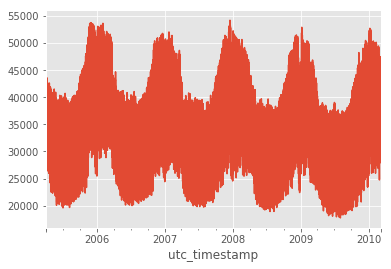

In [5]:
# data = data.astype('float64')
data.head()
data.plot()

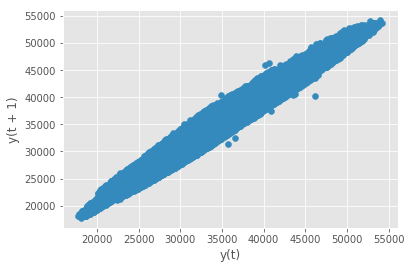

In [6]:
pd.plotting.lag_plot(data)

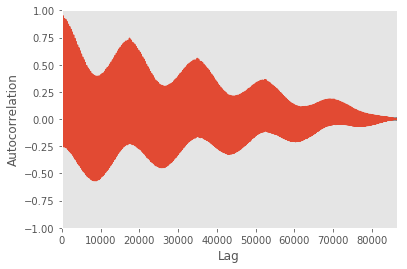

In [7]:
pd.plotting.autocorrelation_plot(data)

In [8]:
data.corr(data.shift(48))

0.9069377901130354

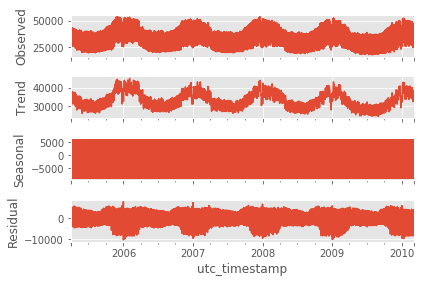

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(data, model='additive', freq=48)
x = decomposed.plot() #See note below about this

In [10]:
dt = data.copy(deep=True)
dt= data.diff()
dt= data.diff()
dt= data.diff()
dt= data.diff()
# dt['Energy Production'] = dt['Energy Production'].diff()
# dt['Energy Production'] = dt['Energy Production'].diff()
# dt['Energy Production'] = dt['Energy Production'].diff()

In [11]:
data.head()

utc_timestamp
2005-04-01 00:00:00    30340.0
2005-04-01 00:30:00    31253.0
2005-04-01 01:00:00    31325.0
2005-04-01 01:30:00    31094.0
2005-04-01 02:00:00    30442.0
Name: GB_EAW_load_actual_tso, dtype: float64

In [12]:
dt = dt.iloc[4:]
dt.head()

utc_timestamp
2005-04-01 02:00:00   -652.0
2005-04-01 02:30:00   -778.0
2005-04-01 03:00:00   -497.0
2005-04-01 03:30:00   -247.0
2005-04-01 04:00:00      9.0
Name: GB_EAW_load_actual_tso, dtype: float64

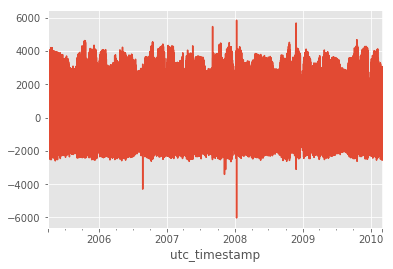

In [13]:
dt.plot()

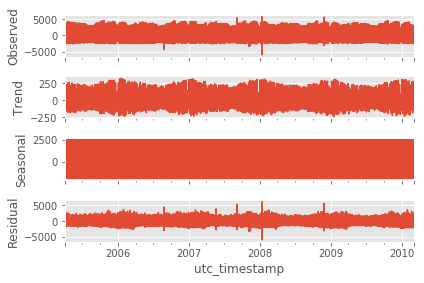

In [14]:
decomposed = seasonal_decompose(dt, model='additive', freq=48)
x = decomposed.plot()

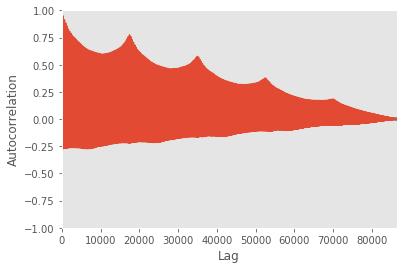

In [15]:
pd.plotting.autocorrelation_plot(dt)

In [16]:
from statsmodels.tsa.ar_model import AR
 
#create train/test datasets
X = dt.dropna()
train_data = X[:int((len(X)*70)/100)]
test_data = X[int((len(X)*70)/100):]
 
#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [17]:
print('The lag value chose is: %s' % model_fitted.k_ar)
 
 
print('The coefficients of the model are:\n %s' % model_fitted.params)
 


The lag value chose is: 60
The coefficients of the model are:
 const                         0.022635
L1.GB_EAW_load_actual_tso     0.637367
L2.GB_EAW_load_actual_tso     0.122151
L3.GB_EAW_load_actual_tso    -0.156988
L4.GB_EAW_load_actual_tso    -0.040777
L5.GB_EAW_load_actual_tso    -0.019414
L6.GB_EAW_load_actual_tso    -0.021791
L7.GB_EAW_load_actual_tso    -0.031587
L8.GB_EAW_load_actual_tso    -0.007961
L9.GB_EAW_load_actual_tso     0.007214
L10.GB_EAW_load_actual_tso   -0.011707
L11.GB_EAW_load_actual_tso   -0.021256
L12.GB_EAW_load_actual_tso    0.003844
L13.GB_EAW_load_actual_tso   -0.020954
L14.GB_EAW_load_actual_tso   -0.009343
L15.GB_EAW_load_actual_tso   -0.055057
L16.GB_EAW_load_actual_tso    0.014834
L17.GB_EAW_load_actual_tso   -0.028537
L18.GB_EAW_load_actual_tso    0.002663
L19.GB_EAW_load_actual_tso   -0.006689
L20.GB_EAW_load_actual_tso    0.003624
L21.GB_EAW_load_actual_tso   -0.054688
L22.GB_EAW_load_actual_tso    0.020999
L23.GB_EAW_load_actual_tso   -0.039564
L

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


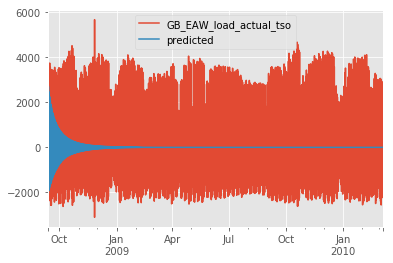

In [18]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
 
# create a comparison dataframe
compare_df = pd.concat(
    [X[int((len(X)*70)/100):],
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})
 
#plot the two values
compare_df.plot()

In [19]:
from sklearn.metrics import r2_score
 
r2 = r2_score(X[int((len(X)*70)/100):], predictions)
r2

0.042605635361623984

In [20]:
import math
from sklearn.metrics import mean_squared_error


# trainPredict = scaler.inverse_transform(trainPredict)
# testPredict = scaler.inverse_transform(testPredict)

# ytrain = scaler.inverse_transform([Ytrain])
# ytest = scaler.inverse_transform([Ytest])
    
# trainScore = math.sqrt(mean_squared_error(ytrain[0], X[:int((len(X)*70)/100)]))    
# print("train Score", trainScore)

testScore = math.sqrt(mean_squared_error(X[int((len(X)*70)/100):], predictions))    
print("train Score", testScore)
# print(ytest[0])

train Score 1094.1946557915849
